In [1]:
#Importing Libraries
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Getting Data
url = 'http://www.imdb.com/chart/top'
resp = requests.get(url)
html = resp.text

In [3]:
#Getting relevant data using BeautifulSoup
soup = BeautifulSoup(html)
pretty_soup = soup.prettify()

movie_name = [desc.find('a').contents[0] for desc in soup.select('td.titleColumn')]
Credits = [desc.find('a')['title'] for desc in soup.select('td.titleColumn')]
year = [info.string for info in soup.select('td.titleColumn span.secondaryInfo')]
votes = [vote['data-value'] for vote in soup.select('td.posterColumn span[name=nv]')]
ratings = [rating['data-value'] for rating in soup.select('td.posterColumn span[name=ir]')]

In [4]:
#Transforming Data 
years =  [re.search('\((.*?)\)', yr).group(1) for yr in year]
Cast = [people.split(',') for people in Credits]
Director,Actor1,Actor2 = [],[],[]
for i in Cast:
    Director.append(re.search('(.*) \(dir.\)', i[0]).group(1))
    Actor1.append(i[1])
    Actor2.append(i[2])

In [5]:
#Converting the Data into a Pandas DataFrame
Movie_List = pd.DataFrame({
        'Movie Name' : movie_name,
        'Release Date' : years,
        'Director' : Director,
        'Actor 1' : Actor1,
        'Actor 2' : Actor2,
        'Rating' : ratings,
        'No. of Votes' : votes
    },columns = ['Movie Name','Release Date','Director','Actor 1','Actor 2','No. of Votes','Rating'])
Movie_List.index += 1
Movie_List.index.name = 'Rank'
Movie_List['Release Date'] = pd.to_numeric(Movie_List['Release Date'])

In [7]:
#Saving into a CSV File
Movie_List.to_csv('IMDB_Data.csv', encoding='utf-8')

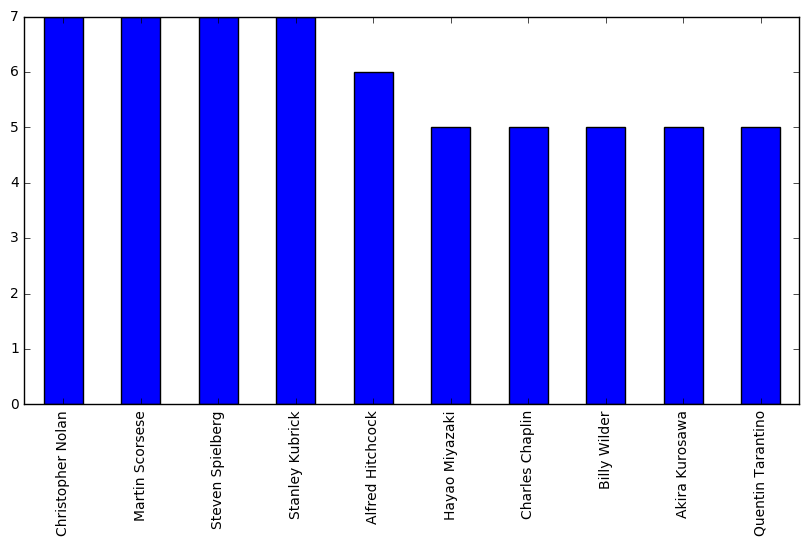

In [8]:
#Top 10 Directors(Most Number of Movies) using Pandas Plot
Movie_List.head()
plt.figure(1)
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
Movie_List['Director'].value_counts().nlargest(10).plot(kind='bar')

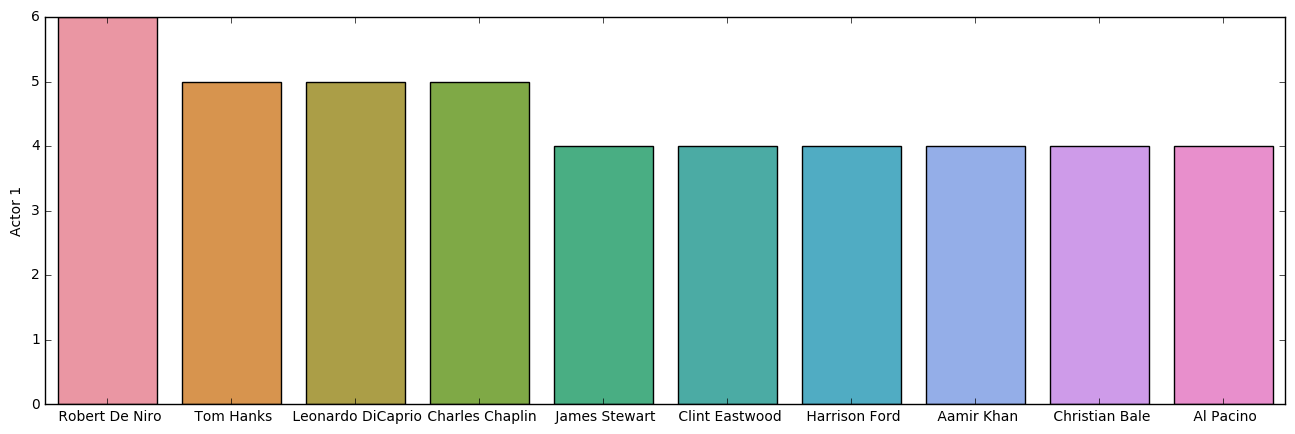

In [9]:
#Top 10 Actors(Most Number of Movies) using Seaborn(better-looking)
plt.figure(2)
fig, ax = plt.subplots()
fig.set_size_inches(16,5)
sns.barplot(x=Movie_List['Actor 1'].value_counts().nlargest(10).index, y=Movie_List['Actor 1'].value_counts().nlargest(10))